In [17]:
from IPython.display import HTML
HTML('''<script>
  function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('#toggleButton').val('Show Code')
    } else {
      $('div.input').show('500');
      $('#toggleButton').val('Hide Code')
    }
    code_shown = !code_shown
  }

  $( document ).ready(function(){
    code_shown=false;
    $('div.input').hide()
  });
</script>
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Show Code"></form>''')

# Fundamentals of Neural Networks

Neural Networks have been extensively employed to solve classification problems. In this tutorial, we shall try to explore how they work.

<center>![Artificial Neural Network](images/Title_ANN.png)
[//]: # (<center>![MNIST NN](images/digitsNN.png))
[//]: # (<center>![Optimizers](images/optimizers.gif))


In [18]:
# Importing pre-requisites
import numpy as np
from ipywidgets import *

# For plots
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib

# For 3D plots
from mpl_toolkits.mplot3d import Axes3D 

# To clear print buffer
from IPython.display import clear_output

# Sigmoid function
def sigmoid(x):
    return 1/(1 + np.exp(-x))

## Introduction to Classification

**Objective**: To guess the class of an input

**Input $X$**: A $d_{i}$-dimensional number (anything can be reduced to numbers), with each dimensional value ranging between 0 and 1

**Output (class) $Y$**: A $d_{o}$-dimensional number, considering there are $d_{o}$ classes the input could belong to. The dimension that has the maximum value among all the $d_{o}$ dimensions is the class the input $X$ belongs to.

For example, given a $50pixels{\times}50pixels$ image of a face, it needs to be figured out whether the face is more likely to belong to Alice or Bob. So our input has $d_{i} = 50*50 =$ 2500 dimensions. Our output has $d_{0} =$ 2 dimensions (Alice, Bob), and the output value in each dimension lies between 0 and 1. So for a face if the output is $(0.3, 0.8)$, it means there is 30% chance that the input face is that of Alice, and 80% chance that it is of Bob.

# Neural Networks

Neural networks are maps from the $d_{i}$-dimensional input $X$ to the $d_{o}$-dimensional output $Y$. In the above image, $d_{i}$ is 3, and $d_{o}$ is 2. Recently they have been performing exceedingly well (better than humans) at classification problems.

The basic building block of a neural network is a neuron (the orange-coloured circles in the first picture). Each neuron takes, say, $d_{i}$-dimensional input and outputs a number between 0 and 1 (one-dimensional).

- We shall first start with visualizing what a single neuron does to a one-dimensional input, and then move on to the effect on multi-dimensional inputs, and how they can be represented as matrix operations.

## Visualizing one neuron's action with a one-dimensional input

A neuron takes an input number, $x$, multiplies it with a weight $w_{1}$, adds a bias weight $w_{0}$ to it, and passes it through a non-linear function, like sigmoid.

In the following example, we shall visualize the action of a single neuron to a single input.
- Try tweaking the weights $w_{0}$ and $w_{1}$ using the sliders
- The weights set on the sliders are displayed in the neuron
- The corresponding changes in the output of the weighted sum, and the output of the neuron are also displayed as graphs


In [98]:
# Visualizing one neuron's output, changing weights w_0 and w_1
def oneNeuron1DInput(w0, w1):
    fig1 = plt.figure()
    axes1 = fig1.add_axes([0.1, 0.1, 0.8, 0.4])
    axes2 = fig1.add_axes([0.54, 0.24, 0.07, 0.12])
    # drawing inputs
    axes1.text(-1.68, 0.7, "(bias)")
    axes1.text(-1.15, 0.7, "1", weight='bold')
    axes1.arrow(-1, 0.7, 0.5, -0.4, head_width=0.05, head_length=0.1, fc='k', ec='k')
    axes1.text(-2.5, -0.1, "(input)", size='xx-large');
    axes1.text(-1.45, -0.1, "x", size='xx-large', weight='bold');
    axes1.arrow(-1.2, 0, 0.7, 0, head_width=0.05, head_length=0.1, fc='k', ec='k')
    # drawing neuron
    circle = plt.Circle((0, 0), radius=.9, fc='#ffa500', ec='k'); axes1.add_patch(circle)
    axes1.text(-0.65, 0.45, "w0="+str(w0), size='small')
    axes1.text(-0.74, -0.14, "w1", size='small')
    axes1.text(-0.84, -0.28, "="+str(w1), size='small')
    wRectangle = plt.Rectangle((-0.4, -0.4), 0.5, 0.8, fc='w', ec='k'); axes1.add_patch(wRectangle)
    axes1.text(-0.38, 0.20, "1*w0"); axes1.text(-0.2, 0, "+")
    axes1.text(-0.38, -0.2, "x*w1")
    axes1.arrow(0.12, 0, 0.13, 0, head_width=0.05, head_length=0.1, fc='k', ec='k')
    axes1.text(0.14, 0.35, "wx", size='large', weight='bold')
    axes1.arrow(0.8, 0, 0.3, 0, head_width=0.05, head_length=0.1, fc='k', ec='k')
    # drawing output
    axes1.text(1.2, -0.1, "y", size='xx-large', weight='bold');
    axes1.text(1.4, -0.1, "(output)", size='xx-large');
    axes1.axis('scaled')
    axes1.grid();
    axes1.set_xlim([-3, 3])
    axes1.set_ylim([-1, 1])
    axes1.axis('off');
    # drawing sigmoid rectangle
    rectangle = plt.Rectangle((-5, 0), 10, 1, fc='w', ec='k')
    axes2.add_patch(rectangle)
    sigmoidX = np.linspace(-5, 5, 100)
    axes2.plot(sigmoidX, sigmoid(sigmoidX), 'r')
    #axes2.axis('scaled')
    axes2.set_xlim([-6, 6])
    axes2.set_ylim([-0.1, 1.1])
    axes2.axis('off');
    
    # drawing graphs
    x = np.linspace(0.0, 1.0, 100)
    f, (ax1, ax2) = plt.subplots(1, 2, sharey=False)
    # graph1
    ax1.plot(x, w0 + w1*x, 'r');
    ax1.set_position([0.1, 0.1, 0.4, 0.5])
    ax1.grid()
    ax1.set_xlim([0,1])
    ax1.set_ylim([-1000,1000])
    ax1.set_xlabel("x (input to neuron)")
    ax1.set_ylabel("wx (weighted sum)")
    ax1.set_title("wx = "+str(w0)+" + x*"+str(w1))
    # graph2
    ax2.plot(x, sigmoid(w0 + w1*x), 'r');
    ax2.set_position([0.7, 0.1, 0.4, 0.5])
    ax2.grid()
    ax2.set_xlim([0,1])
    ax2.set_ylim([-0.03,1.03])
    ax2.set_xlabel("x (input to neuron)")
    ax2.set_ylabel("y (output of neuron)")
    ax2.set_title("y = sigmoid("+str(w0)+" + x*"+str(w1)+")")

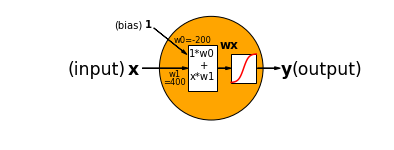

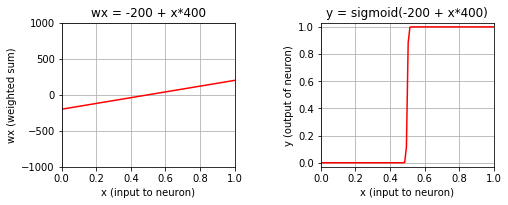

In [99]:
interact(oneNeuron1DInput, w0=widgets.IntSlider(min=-500, max=500, step=25, value=-200), w1=widgets.IntSlider(min=-500, max=500, step=25, value=400));

We assume the input ranges from 0 to 1 (to normalize different-ranged dimensions of the input). In addition to the input, there is a bias value of 1 added to provide more flexibility to the output.

The first operation done by the neuron is to multiply its inputs (including the bias value) with some weights, and sum those values:

$$y = 1*w_{0} \;+\; x*w_{1}$$

The second operation is to make y non-linear. A common function that is used to non-linearity is the sigmoid function:

$$z = sigmoid(y) = \frac{1}{1+e^{-y}} = \frac{1}{1+e^{-(w_{0} + x*w_{1})}}$$

This way, the output (z) always lies in the range of 0 to 1.


## Visualizing one neuron's action with a multi-dimensional input

Suppose our input has $d_{i}$ dimensions. For the sake of visualization, we shall assume $d_{i} = 2$, meaning our inputs are 2-dimensional points (presumably on a Euclidean plane). Let's visualize the output of a neuron fed with a 2-dimensional input:

In [112]:
# Visualizing one neuron's output, changing weights w_0, w_1 and w_2
def oneNeuron2DInput(w0, w1, w2):
    fig1 = plt.figure()
    axes1 = fig1.add_axes([0.1, 0.1, 0.8, 0.3])
    axes2 = fig1.add_axes([0.53, 0.2, 0.05, 0.1])
    # drawing x_0, x_1, x_2
    axes1.text(-2.4, 0.7, "(bias)")
    axes1.text(-1.7, 0.7, "1", weight='bold')
    axes1.arrow(-1.5, 0.7, 0.8, -0.4, head_width=0.05, head_length=0.1, fc='k', ec='k')
    axes1.text(-2.3, -0.05, "x_0", weight='bold');
    axes1.arrow(-1.7, 0, 1, 0, head_width=0.05, head_length=0.1, fc='k', ec='k')
    axes1.text(-2, -0.9, "x_1", weight='bold')
    axes1.arrow(-1.8, -0.7, 1.1, 0.4, head_width=0.05, head_length=0.1, fc='k', ec='k')
    # drawing neuron
    circle = plt.Circle((0, 0), radius=.9, fc='#ffa500', ec='k'); axes1.add_patch(circle)
    axes1.text(-1.1, 0.55, "w0", size='small'); axes1.text(-1.5, 0.35, str(w0), size='small')
    axes1.text(-1.45, 0.06, "w1", size='small'); axes1.text(-1.45, -0.2, str(w1), size='small')
    axes1.text(-1.48, -0.45, "w2", size='small'); axes1.text(-1.2, -0.65, str(w2), size='small')
    wRectangle = plt.Rectangle((-0.6, -0.4), 0.65, 0.8, fc='w', ec='k'); axes1.add_patch(wRectangle)
    axes1.text(-0.5, 0.25, "1*w0", size='small'); axes1.text(-0.35, 0.1, "+", size='x-small')
    axes1.text(-0.58, -0.05, "x0*w1", size='small'); axes1.text(-0.35, -0.2, "+", size='x-small')
    axes1.text(-0.58, -0.35, "x1*w2", size='small')
    axes1.arrow(0.05, 0, 0.2, 0, head_width=0.05, head_length=0.1, fc='k', ec='k')
    axes1.text(0.1, 0.3, "wx", size='large', weight='bold')
    axes1.arrow(0.8, 0, 0.3, 0, head_width=0.05, head_length=0.1, fc='k', ec='k')
    # drawing output
    axes1.text(1.2, -0.1, "y", size='xx-large', weight='bold');
    axes1.text(1.5, -0.1, "(output)", size='xx-large');
    axes1.axis('scaled')
    axes1.grid();
    axes1.set_xlim([-3, 3])
    axes1.set_ylim([-1, 1])
    axes1.axis('off');
    
    # drawing sigmoid rectangle
    rectangle = plt.Rectangle((-5, 0), 10, 1, fc='w', ec='k')
    axes2.add_patch(rectangle)
    sigmoidX = np.linspace(-5, 5, 100)
    axes2.plot(sigmoidX, sigmoid(sigmoidX), 'r')
    #axes2.axis('scaled')
    axes2.set_xlim([-6, 6])
    axes2.set_ylim([-0.1, 1.1])
    axes2.axis('off');
    
    # drawing graphs
    x1 = np.linspace(0.0, 1.0, 50)
    x2 = np.linspace(0.0, 1.0, 50)
    X1,X2 = np.meshgrid(x1, x2)
    fig = plt.figure(figsize=(9, 3))
    # graph1
    ax1 = fig.add_subplot(1, 2, 1, projection='3d')
    ax1.plot_surface(X1, X2, (w0 + w1*X1 + w2*X2), rstride=5, cstride=5, linewidth=0)
    ax1.set_xlim([-0.03,1.03]); ax1.set_ylim([-0.03,1.03]); ax1.set_zlim([-1000,1000])
    ax1.set_xlabel("x_0"); ax1.set_ylabel("x_1"); ax1.set_zlabel("y")
    ax1.set_title("wx = 1*("+str(w0)+") + x_0*("+str(w1)+") + x_1*("+str(w2)+")")
    # graph2
    ax2 = fig.add_subplot(1, 2, 2, projection='3d')
    ax2.plot_surface(X1, X2, sigmoid(w0 + w1*X1 + w2*X2), rstride=2, cstride=2, cmap=matplotlib.cm.gray, linewidth=0.2);
    ax2.set_xlim([-0.03,1.03]); ax2.set_ylim([-0.03,1.03]); ax2.set_zlim([-0.03,1.03])
    ax2.set_xlabel("x_0"); ax2.set_ylabel("x_1"); ax2.set_zlabel("y")
    ax2.set_title("y = sigmoid(1*("+str(w0)+") + x_0*("+str(w1)+") + x_1*("+str(w2)+"))")
    fig.tight_layout()
    
w0Slider = widgets.IntSlider(min=-500, max=500, step=25, value=-200)
w1Slider = widgets.IntSlider(min=-500, max=500, step=25, value=300)
w2Slider = widgets.IntSlider(min=-500, max=500, step=25, value=150)

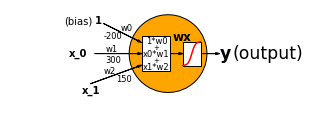

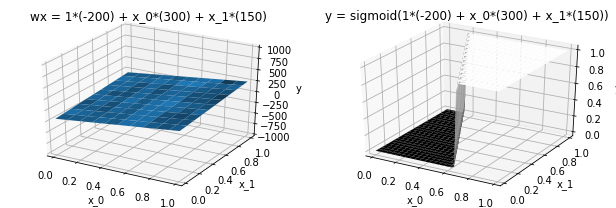

In [113]:
interact(oneNeuron2DInput, w0=w0Slider, w1=w1Slider, w2=w2Slider);

Try tweaking the weights w0, w1, w2 to see the changes to the output of the neuron, for all possibilities of x0 and x1.

To keep things simple, let us try to implement logic gates through neural networks.

Can you implement AND? (Hint: -250, 200, 200)

OR? (Hint: -100, 200, 200)

NAND? NOR?

XOR?

## Ill-posed problem

As can be seen, there are multiple solutions (weight tuples) that can solve the same problem. 

So, neural networks are ill-posed. It is also difficult to **arrive** at a solution from a random initialization - unless there are loads of inputs.

## Non-linear activation functions

- For classification problems, it is imperative that we use non-linear activation functions.

There's only so much one can do with linear combinations.

- Apart from sigmoid, other non-linear activations like ReLU (REctified Linear Unit), tanh can also be used.

## More neurons

- One neuron can make a planar decision boundary. 

The XOR function: ${(0,0),(1,1)}==0;{(0,1),(1,0)}==1{(0,0),(1,1)}==0;{(0,1),(1,0)}==1$, cannot have a linear boundary that is able to distinguish all of these 4 points into their classes correctly.

Thus, we need more neurons to be able to make more complicated decision boundaries.


## Visualizing a 3-layered network's action with a multi-dimensional input

Suppose our input has $d_{i}$ dimensions. For the sake of visualization, we shall assume $d_{i} = 2$, meaning our inputs are 2-dimensional points (presumably on a Euclidean plane). Let's visualize the output of a network of 3 neurons fed with a 2-dimensional input:

In [211]:
# Visualizing three-layered neural network, changing weights w_0, w_1 and w_2
def threeNeurons2DInput(w11_0, w11_1, w11_2, w12_0, w12_1, w12_2, w2_0, w2_1, w2_2):
    fig, ax = plt.subplots(1, 1, figsize=(14,4))
    ax.set_xlim([2, 16])
    ax.set_ylim([0, 4])
    # inputs
    ax.text(3, 2.4, "x_0", size='x-large', weight='bold')
    circle = plt.Circle((4, 2.5), radius=.1, fc='k'); ax.add_patch(circle)
    ax.text(3, 1.4, "x_1", size='x-large', weight='bold')
    circle = plt.Circle((4, 1.5), radius=.1, fc='k'); ax.add_patch(circle)
    # neurons
    circle = plt.Circle((8, 3), radius=.6, fc='#ffa500', ec='k'); ax.add_patch(circle)
    circle = plt.Circle((8, 1), radius=.6, fc='#ffa500', ec='k'); ax.add_patch(circle)
    circle = plt.Circle((12, 2), radius=.6, fc='#ffa500', ec='k'); ax.add_patch(circle)
    # arrows
    ax.arrow(4, 2.5, 3.3, 0.6, head_width=0.1, head_length=0.1, fc='k', ec='k')
    ax.arrow(4, 2.5, 3.3, -1.4, head_width=0.1, head_length=0.1, fc='k', ec='k')
    ax.arrow(4, 1.5, 3.3, 1.4, head_width=0.1, head_length=0.1, fc='k', ec='k')
    ax.arrow(4, 1.5, 3.3, -0.6, head_width=0.1, head_length=0.1, fc='k', ec='k')
    ax.arrow(8.6, 3, 2.7, -0.8, head_width=0.1, head_length=0.1, fc='k', ec='k')
    ax.arrow(8.6, 1, 2.7, 0.8, head_width=0.1, head_length=0.1, fc='k', ec='k')
    # weights
    ax.text(5.5, 2.94, str(w11_1), size='large', weight='bold')
    ax.text(6.5, 2.34, str(w11_2), size='large', weight='bold')
    ax.text(5.8, 1.76, str(w12_1), size='large', weight='bold')
    ax.text(5.8, 0.8, str(w12_2), size='large', weight='bold')
    ax.text(9.7, 2.75, str(w2_1), size='large', weight='bold')
    ax.text(9.7, 1.05, str(w2_2), size='large', weight='bold')
    # biases
    ax.text(6.8, 3.45, "1", size='large', weight='bold')
    ax.arrow(7, 3.5, 0.4, -0.1, head_width=0.1, head_length=0.1, fc='k', ec='k')
    ax.text(7.2, 3.6, str(w11_0), size='large', weight='bold')
    ax.text(6.8, 1.45, "1", size='large', weight='bold')
    ax.arrow(7, 1.5, 0.4, -0.1, head_width=0.1, head_length=0.1, fc='k', ec='k')
    ax.text(7.2, 1.6, str(w12_0), size='large', weight='bold')
    ax.text(10.9, 2.55, "1", size='large', weight='bold')
    ax.arrow(11.1, 2.6, 0.4, -0.1, head_width=0.1, head_length=0.1, fc='k', ec='k')
    ax.text(11.3, 2.7, str(w2_0), size='large', weight='bold')
    # outputs
    ax.text(8.7, 3.2, "y_0", size='x-large', weight='bold')
    ax.text(8.7, 0.8, "y_1", size='x-large', weight='bold')
    ax.arrow(12.6, 2, 1, 0, head_width=0.1, head_length=0.2, fc='k', ec='k')
    ax.text(14, 1.9, "y (output)", size='x-large', weight='bold')
    
    ax.axis('off')

    # Figures
    x1 = np.linspace(0.0, 1.0, 50)
    x2 = np.linspace(0.0, 1.0, 50)
    X1,X2 = np.meshgrid(x1, x2)
    Y1 = sigmoid(w11_0 + w11_1*X1 + w11_2*X2)
    Y2 = sigmoid(w12_0 + w12_1*X1 + w12_2*X2)
    Z = sigmoid(w2_0 + w2_1*Y1 + w2_2*Y2)
    fig = plt.figure(figsize=(12, 3))
    # graph1
    ax1 = fig.add_subplot(1, 3, 1, projection='3d')
    ax1.plot_surface(X1, X2, Y1, rstride=2, cstride=2, linewidth=0.2, cmap=matplotlib.cm.gray)
    ax1.set_xlim([-0.03,1.03]); ax1.set_ylim([-0.03,1.03]); ax1.set_zlim([-0.03,1.03])
    ax1.set_xlabel("x_0"); ax1.set_ylabel("x_1"); ax1.set_zlabel("y_0")
    ax1.set_title("y_0 = sigmoid(1*("+str(w11_0)+") + x_0*("+str(w11_1)+") + x_1*("+str(w11_2)+"))", size='medium')
    # graph2
    ax1 = fig.add_subplot(1, 3, 2, projection='3d')
    ax1.plot_surface(X1, X2, Y2, rstride=2, cstride=2, linewidth=0.2, cmap=matplotlib.cm.gray)
    ax1.set_xlim([-0.03,1.03]); ax1.set_ylim([-0.03,1.03]); ax1.set_zlim([-0.03,1.03])
    ax1.set_xlabel("x_0"); ax1.set_ylabel("x_1"); ax1.set_zlabel("y_1")
    ax1.set_title("y_1 = sigmoid(1*("+str(w12_0)+") + x_0*("+str(w12_1)+") + x_1*("+str(w12_2)+"))", size='medium')
    # graph3
    ax1 = fig.add_subplot(1, 3, 3, projection='3d')
    ax1.plot_surface(X1, X2, Z, rstride=2, cstride=2, linewidth=0.2, cmap=matplotlib.cm.gray)
    ax1.set_xlim([-0.03,1.03]); ax1.set_ylim([-0.03,1.03]); ax1.set_zlim([0.03,1.03])
    ax1.set_xlabel("x_0"); ax1.set_ylabel("x_1"); ax1.set_zlabel("y")
    ax1.set_title("y = sigmoid(1*("+str(w2_0)+") + y_0*("+str(w2_1)+") + y_1*("+str(w2_2)+"))", size='medium')
    fig.tight_layout()

w11_0Slider = widgets.IntSlider(min=-500, max=500, step=25, value=-250)
w11_1Slider = widgets.IntSlider(min=-500, max=500, step=25, value=350)
w11_2Slider = widgets.IntSlider(min=-500, max=500, step=25, value=350)
w12_0Slider = widgets.IntSlider(min=-500, max=500, step=25, value=-250)
w12_1Slider = widgets.IntSlider(min=-500, max=500, step=25, value=200)
w12_2Slider = widgets.IntSlider(min=-500, max=500, step=25, value=200)
w2_0Slider = widgets.IntSlider(min=-500, max=500, step=25, value=-100)
w2_1Slider = widgets.IntSlider(min=-500, max=500, step=25, value=500)
w2_2Slider = widgets.IntSlider(min=-500, max=500, step=25, value=-500)

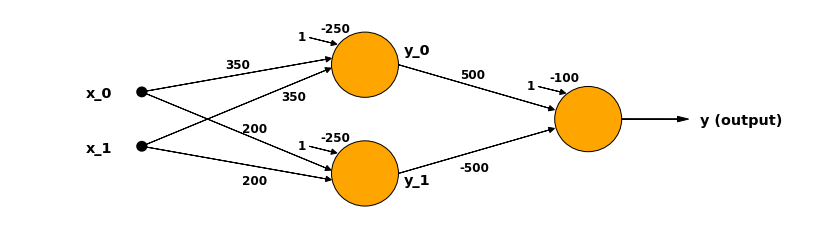

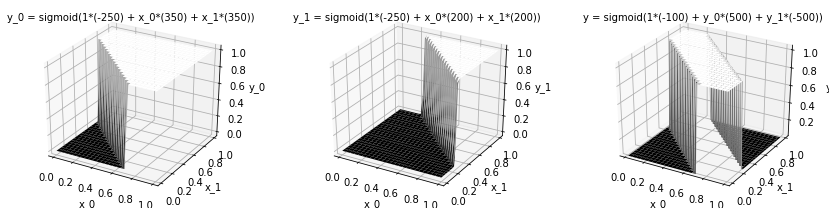

In [212]:
interact(threeNeurons2DInput, w11_0=w11_0Slider, w11_1=w11_1Slider, w11_2=w11_2Slider,
         w12_0=w12_0Slider, w12_1=w12_1Slider, w12_2=w12_2Slider,
         w2_0=w2_0Slider, w2_1=w2_1Slider, w2_2=w2_2Slider);

With the above network, we can make XOR, XNOR, and other such complicated classifications.

With more complicated networks, we get more flexibility. At the end of this tutorial, we shall build the following network:

<center>![MNIST NN](images/digitsNN.png)

To scale up calculations for such complicated networks, we represent the inputs, weights, and outputs as matrices, and use matrix operations.

Below, we shall look at how the above calculations can be made into matrix operations, and only use the matrix notations from then on.

# Matrix representations

## Matrix representations - input to the network

Suppose an input has $d_{i}$ dimensions. (Remember that the input has been normalized to range between 0 and 1.)

Then each input would be:

$$X \; (without bias) _{1{\times}d_{i}} = \left[ \begin{array}{c} x_{0} & x_{1} & \cdots & x_{(d_{i}-1)} \end{array} \right] _{1{\times}d_{i}}$$

After adding the bias term,

$$X_{1{\times}(d_{i}+1)} = \left[ \begin{array}{c} 1 & X_{1{\times}d_{i}} \end{array} \right] _{1{\times}(d_{i}+1)}$$

For example, one of the data points given above to make a logic gate was $(0,1)$. Here, $X = \left[ \begin{array}{c} 1 & 0 & 1 \end{array} \right]_{1{\times}(2+1)}$

Suppose we provide $n$ $d_{i}$-dimensional data points. For the first layer of neurons, we can make an input matrix of $n{\times}d_{i}$ dimension.

$$X^{(1)}_{n{\times}(d_{i}+1)} = 
\left[ \begin{array}{c} 1 & _{(0)}X \\ 1 & _{(1)}X \\ \vdots & \vdots \\ 1 & _{(n-1)}X \end{array} \right] _{n{\times}(d_{i}+1)}
=
\left[ \begin{array}{c} 
1 & _{(0)}x_{0} & _{(0)}x_{1} & _{(0)}x_{2} & \cdots & _{(0)}x_{(d_{i}-1)} \\ 
1 & _{(1)}x_{0} & _{(1)}x_{1} & _{(1)}x_{2} & \cdots & _{(1)}x_{(d_{i}-1)} \\ 
\vdots & \vdots & \vdots & \vdots & \ddots & \vdots \\ 
1 & _{(n-1)}x_{0} & _{(n-1)}x_{1} & _{(n-1)}x_{2} & \cdots & _{(n-1)}x_{(d_{i}-1)} 
\end{array} \right] _{n{\times}(d_{i}+1)}$$

For example, for logic gates, the input matrix was $X = \left[ \begin{array}{c} 1 & 0 & 0 \\ 1 & 0 & 1 \\ 1 & 1 & 0 \\ 1 & 1 & 1 \end{array} \right] _{4{\times}3} $

## Matrix representations - output of a layer

Suppose the output of the $l^{th}$ layer has $o_{l}$ dimensions, meaning there are $o_{l}$ neurons in the layer.

In the above example, the output of the 1st Layer of 2 neurons is $o_{1} = 2$, and the output of the 2nd layer of 1 neuron is $o_{2} = 1$.

For each input, the output is an $o_{l}$-dimensional vector:

$$Y^{(l)} = \left[ \begin{array}{c} y_{[0]}^{(l)} & y_{[1]}^{(l)} & \cdots & y_{[o_{l}-1]}^{(l)} \end{array} \right] _{1{\times}o_{l}}$$


For example, for an AND gate, the output of $(0,1)$ is $Y = \left[ \begin{array}{c} 0 \end{array} \right] _{1{\times}1}$

Thus, for $n$ data points, the output is:

$$Y^{(l)} = \left[ \begin{array}{c} 
{_{(0)}}Y^{(l)} \\ {_{(1)}}Y^{(l)} \\ \vdots \\ _{(n-1)}Y^{(l)} \end{array} \right] _{n{\times}o_{l}} 
= \left[ \begin{array}{c} 
{_{(0)}}y_{[0]}^{(l)} & \cdots & {_{(0)}}y_{[o_{l}-1]}^{(l)} \\ 
{_{(1)}}y_{[0]}^{(l)} & \cdots & {_{(1)}}y_{[o_{l}-1]}^{(l)} \\ 
\vdots & \ddots & \vdots \\ 
_{(n-1)}y_{[0]}^{(l)} & \cdots & _{(n-1)}y_{[o_{l}-1]}^{(l)} 
\end{array} \right] _{n{\times}o_{l}}$$

For example, for an AND gate, the output matrix is $Y = \left[ \begin{array}{c} 0 \\ 0 \\ 0 \\ 1 \end{array} \right] _{4{\times}1}$

## Matrix representations - input to a layer

Suppose at the $l^{th}$ layer, the input has $i_{l}$ dimensions.

(The number of inputs to the layer) = (1 bias term) + (the number of outputs from the previous layer):
$$i_{l} = 1 + o_{(l-1)}$$

In the above example, the input to the first layer of 2 neurons has $i_{1} = d_{i}+1 = 3$, and the second layer of 1 neuron has $i_{2} = o_{1} + 1 = 3$.

If there are $n$ data points given, the input to the $l^{th}$ layer would be an $n{\times}i_{l} = n{\times}(o_{(l-1)}+1)$ matrix:

$$X^{(l)}_{n{\times}i_{l}} 
= \left[ \begin{array}{c} 
1 & _{(0)}Y^{(l-1)} \\ 
1 & _{(1)}Y^{(l-1)} \\ 
\vdots & \vdots \\  
1 & _{(n-1)}Y^{(l-1)} 
\end{array} \right] _{n{\times}i_{l}}
= \left[ \begin{array}{c} 
1 & _{(0)}y^{(l-1)}_{[0]} & \cdots & _{(0)}y^{(l-1)}_{[o_{l-1}-1]} \\ 
1 & _{(1)}y^{(l-1)}_{[0]} & \cdots & _{(1)}y^{(l-1)}_{[o_{l-1}-1]} \\ 
\vdots & \vdots & \ddots & \vdots \\ 
1 & _{(n-1)}y^{(l-1)}_{[0]} & \cdots & _{(n-1)}y^{(l-1)}_{[o_{l-1}-1]} 
\end{array} \right] _{n{\times}i_{l}}$$

For example, in the 3-neurons neural network above, input matrix to the first layer is $\left[ \begin{array}{c} 1 & x_0 & x_1 \end{array} \right] _{1{\times}3}$, and the input matrix to the second layer is $\left[ \begin{array}{c} 1 & y_0 & y_1 \end{array} \right] _{1{\times}3}$

## Matrix representations - weight matrix of one neuron

For a neuron, the weight matrix multiplies a weight with each input in every dimension, and sums them. This can be represented by a dot product.

Assuming the input to the $k^{th}$ neuron in the $l^{th}$ layer has $i_{l}$ dimensions,

$$W^{(l)}_{[k]} {_{1{\times}i_{l}}} = \left[ \begin{array}{c} w^{(l)}_{[k],0} & w^{(l)}_{[k],1} & \cdots & w^{(l)}_{[k],i_{l}-1} \end{array} \right] _{1{\times}i_{l}}$$

(Remember $i_{l} = 1 + o_{(l-1)}$)

Then the output of that neuron for one data point is x < dot product \> weights.

$$y^{(l)}_{[k]} {_{1{\times}1}} = Sigmoid( x^{(l)} {_{1{\times}i_{l}}} \; .* \; W^{(l)}_{[k]}{^T}{_{i_{l}{\times}1}} )$$

$$
=
Sigmoid \left(
x^{(l)}_{[k]}
\left[ \begin{array}{c} 1 & y^{(l-1)}_{0} & \cdots & y^{(l-1)}_{(o_{l-1}-1)}
\end{array} \right] _{1{\times}i_{l}}
\;\;\; .* \;\;\;
W^{(l)}_{[k]} {^{T}}
\left[ \begin{array}{c} w^{(l)}_{[k],0} \\ w^{(l)}_{[k],1} \\ \vdots \\ w^{(l)}_{[k],i_{l}-1} \end{array} \right] _{i_{l}{\times}1}
\right)
$$

$$
= Sigmoid(1*w^{(l)}_{[k],0} \;\;+\;\; y^{(l-1)}_{0}*w^{(l)}_{[k],1} \;\;+\;\; ... \;\;+\;\; y^{(l-1)}_{o_{l-1}-1}*w^{(l)}_{[k],i_{l}-1})
$$

(We can see that the dot product of the $x$ and $W$ matrices does indeed give the output of the neuron)

For $n$ data points, the output of the $k^{th}$ neuron in the $l^{th}$ layer is:
$$Y^{(l)}_{[k]} {_{n{\times}1}}
=
Sigmoid \left(
X^{(l)}_{[k]}
\left[ \begin{array}{c} 
1 & _{(0)}y^{(l-1)}_{0} & \cdots & _{(0)}y^{(l-1)}_{(o_{l-1}-1)} \\
1 & _{(1)}y^{(l-1)}_{0} & \cdots & _{(1)}y^{(l-1)}_{(o_{l-1}-1)} \\
\vdots & \vdots & \ddots & \vdots \\
1 & _{(n-1)}y^{(l-1)}_{0} & \cdots & _{(n-1)}y^{(l-1)}_{(o_{l-1}-1)}
\end{array} \right] _{n{\times}i_{l}}
\; .* \;
W^{(l)}_{[k]} {^{T}}
\left[ \begin{array}{c} w^{(l)}_{[k],0} \\ w^{(l)}_{[k],1} \\ \vdots \\ w^{(l)}_{[k],i_{l}-1} \end{array} \right] _{i_{l}{\times}1}
\right)
$$

$$
=
Sigmoid \left(
\left[ \begin{array}{c} 
1*w^{(l)}_{[k],0} \;\;+\;\; _{(0)}y^{(l-1)}_{(0)}*w^{(l)}_{[k],1} \;\;+\;\; ... \;\;+\;\; _{(0)}y^{(l-1)}_{o_{l-1}-1}*w^{(l)}_{[k],i_{l}-1} \\
1*w^{(l)}_{[k],0} \;\;+\;\; _{(1)}y^{(l-1)}_{0}*w^{(l)}_{[k],1} \;\;+\;\; ... \;\;+\;\; _{(1)}y^{(l-1)}_{o_{l-1}-1}*w^{(l)}_{[k],i_{l}-1} \\
\vdots \\
1*w^{(l)}_{[k],0} \;\;+\;\; _{(n-1)}y^{(l-1)}_{0}*w^{(l)}_{[k],1} \;\;+\;\; ... \;\;+\;\; _{(n-1)}y^{(l-1)}_{o_{l-1}-1}*w^{(l)}_{[k],i_{l}-1} \\
\end{array} \right] _{n{\times}1}
\right)
$$

## Matrix representations - weight of a layer of neurons

Suppose the $l^{th}$ layer in a neural network has $o_{l}$ neurons.

Each neuron would produce one number as its output - the dot product of its weights, and the inputs.

In matrix form, the weight matrix of the layer is:

$$
W^{(l)}_{o_{l}{\times}i_{l}} = \left[ \begin{array}{c} W^{(l)}_{[0]} \\ W^{(l)}_{[1]} \\ \cdots \\ W^{(l)}_{[o_{l}-1]} \end{array} \right] _{o_{l}{\times}i_{l}} 
= 
\left[ \begin{array}{c} 
w^{(l)}_{[0],0} & w^{(l)}_{[0],1} & w^{(l)}_{[0],2} & \cdots & w^{(l)}_{[0],i_{l}-1} \\ 
w^{(l)}_{[1],0} & w^{(l)}_{[1],1} & w^{(l)}_{[1],2} & \cdots & w^{(l)}_{[1],i_{l}-1} \\ 
\vdots & \vdots & \vdots & \ddots & \vdots \\ 
w^{(l)}_{[o_{l}-1],0} & w^{(l)}_{[o_{l}-1],1} & w^{(l)}_{[o_{l}-1],2} & \cdots & w^{(l)}_{[o_{l}-1],i_{l}-1} 
\end{array} \right] _{o_{l}{\times}i_{l}}
$$

The output of this layer of neurons is:

$$ Y^{(l)}_{n{\times}o_{l}} = Sigmoid\;(\;X^{(l)}_{n{\times}i_{l}} \; .* \; W^{(l)}{^{T}}_{i_{l}{\times}o_{l}} \;)\; $$

$$
Y^{(l)}_{n{\times}o_{l}} \left[ \begin{array}{c} 
{_{(0)}}y_{0}^{(l)} & \cdots & {_{(0)}}y_{o_{l}-1}^{(l)} \\ 
{_{(1)}}y_{0}^{(l)} & \cdots & {_{(1)}}y_{o_{l}-1}^{(l)} \\ 
\vdots & \ddots & \vdots \\ 
_{(n-1)}y_{0}^{(l)} & \cdots & _{(n-1)}y_{o_{l}-1}^{(l)} 
\end{array} \right] _{n{\times}o_{l}}
=
Sigmoid \left(
X^{(l)}_{n{\times}i_{l}} \left[ \begin{array}{c} 
1 & _{(0)}y^{(l-1)}_{0} & \cdots & _{(0)}y^{(l-1)}_{(o_{l-1}-1)} \\ 
1 & _{(1)}y^{(l-1)}_{0} & \cdots & _{(1)}y^{(l-1)}_{(o_{l-1}-1)} \\ 
\vdots & \vdots & \ddots & \vdots \\ 
1 & _{(n-1)}y^{(l-1)}_{0} & \cdots & _{(n-1)}y^{(l-1)}_{(o_{l-1}-1)} 
\end{array} \right] _{n{\times}i_{l}}
\; .* \;
W^{(l)}{^{T}}_{i_{l}{\times}o_{l}} \left[ \begin{array}{c} 
w^{(l)}_{[0],0} & w^{(l)}_{[1],1} & \cdots & w^{(l)}_{[o_{l}-1],0} \\ 
w^{(l)}_{[0],1} & w^{(l)}_{[1],1} & \cdots & w^{(l)}_{[o_{l}-1],1} \\ 
\vdots & \vdots & \ddots & \vdots \\ 
w^{(l)}_{[0],i_{l}-1} & w^{(l)}_{[1],1} & \cdots & w^{(l)}_{[o_{l}-1],i_{l}-1} 
\end{array} \right] _{i_{l}{\times}o_{l}}
\right)
$$

$$
=
Sigmoid \left(
\left[ \begin{array}{c} 
1*w^{(l)}_{[0],0} + \cdots + _{(0)}y^{(l-1)}_{(i_{l-1}-1)}*w^{(l)}_{[0],i_{l-1}-1}
&
\cdots
&
1*w^{(l)}_{[(o_{l}-1)],0} + \cdots + _{(0)}y^{(l-1)}_{(i_{l-1}-1)}*w^{(l)}_{[(o_{l}-1)],i_{l-1}-1}
\\
\vdots & \ddots & \vdots
\\
1*w^{(l)}_{[0],0} + \cdots + _{(n-1)}y^{(l-1)}_{(i_{l-1}-1)}*w^{(l)}_{[0],i_{l-1}-1}
&
\cdots
&
1*w^{(l)}_{[(o_{l}-1)],0} + \cdots + _{(n-1)}y^{(l-1)}_{(i_{l-1}-1)}*w^{(l)}_{[(o_{l}-1)],i_{l-1}-1}
\end{array} \right] _{n{\times}o_{l}}
\right)
$$

## Conclusion

We have seen that the action of a layer of a neural network can be written as the following matrix operation:

$$ Y^{(l)}_{n{\times}o_{l}} = Sigmoid\;(\;X^{(l)}_{n{\times}i_{l}} \; .* \; W^{(l)}{^{T}}_{i_{l}{\times}o_{l}} \;)\; $$

So, a neural network can be defined as the set of weights $W^{(l)}_{i_{l}{\times}o_{l}}$ for all its layers, where $l$ is the index of the layer we are considering, $i_{l}$ and $o_{l}$ are its input and output dimensions.

Also, because of adding a bias term at every layer,

$$i_{l} = 1 + o_{(l-1)}$$

The utility of neural networks can be exploited only once the weight matrices $W^{(l)}_{i_{l}{\times}o_{l}}$ for all $l$ have ben set according to need.

# Writing a neural network in python

Firstly, a neural network is defined by the number of layers, and the number of neurons in each layer.

Let us use a list to denote this.

In [158]:
# Defining the sizes of the layers in our neural network
layers = [2, 2, 1]

The above code denotes the 3-neuron neural network we saw previously: 2-dimensional input, 2 neurons in a hidden layer, 1 neuron in the output layer.

Generally speaking, a neural network than has more than 1 hidden layer is a **deep** neural network.

## Defining weight matrices

Using the sizes of the layers in our neural network, let us initialize the weight matrices to random values (sampled from a standard normal gaussian, because we know that we need both positive and negative weights).

In [190]:
# Initializing weight matrices from layer sizes
def initializeWeights(layers):
    weights = [np.random.randn(o, i+1) for i, o in zip(layers[:-1], layers[1:])]
    return weights

In [191]:
# Displaying weight matrices
layers = [2, 2, 1]
weights = initializeWeights(layers)

for i in range(len(weights)):
    print(i+1); print(weights[i].shape); print(weights[i])

1
(2, 3)
[[-0.51686034 -0.25821847 -0.12196325]
 [-1.68518586 -0.16138433 -1.42505722]]
2
(1, 3)
[[-0.23818555  0.72738913 -0.6344987 ]]


# Forward Propagation

The output of the neural network is calculated by **propagating forward** the outputs of each layer.

So let us define another variable that stores the output of each layer, and uses that as the input to the next layer.

In [192]:
# We shall use np.array() to represent matrices
#X = np.array([23, 42, 56])
X = np.array([[0,0], [0,1], [1,0], [1,1]])

In [193]:
# Add a bias term to every data point in the input
def addBiasTerms(X):
        # Make the input an np.array()
        X = np.array(X)
        
        # Forcing 1D vectors to be 2D matrices of 1xlength dimensions
        if X.ndim==1:
            X = np.reshape(X, (1, len(X)))
        
        # Inserting bias terms
        X = np.insert(X, 0, 1, axis=1)
        
        return X

In [194]:
# Testing addBiasTerms
print("Before adding bias terms: "); print(X)
X = addBiasTerms(X)
print("After adding bias terms: "); print(X)

Before adding bias terms: 
[[0 0]
 [0 1]
 [1 0]
 [1 1]]
After adding bias terms: 
[[1 0 0]
 [1 0 1]
 [1 1 0]
 [1 1 1]]


In [205]:
def sigmoid(y):
    return 1/(1 + np.exp(-y))

In [207]:
# Forward Propagation of outputs
def forwardProp(X, weights):
    # Initializing an empty list of outputs
    outputs = []
    
    # Assigning a name to reuse as inputs
    inputs = X
    
    # For each layer
    for w in weights:
        # Add bias term to input
        inputs = addBiasTerms(inputs)
        
        # Y = Sigmoid ( X .* W^T )
        outputs.append(sigmoid(np.dot(inputs, w.T)))
        
        # Input of next layer is output of this layer
        inputs = outputs[-1]
        
    return outputs
    

Use the following cell to test forward propagation:

In [219]:
# VIEWING FORWARD PROPAGATION

# Initialize network
layers = [2, 2, 1]
#weights = initializeWeights(layers)

# 3-neuron network
weights = []
weights.append(np.array([[-250, 350, 350], [-250, 200, 200]]))
weights.append(np.array([[-100, 500, -500]]))

print("weights:")
for i in range(len(weights)):
    print(i+1); print(weights[i].shape); print(weights[i])

# Input
X = [[0,0], [0,1], [1,0], [1,1]]

print("X:"); print(X)

# Forward propagate X, and save outputs
outputs = forwardProp(X, weights)

print("outputs:")
for o in range(len(outputs)):
    print(o+1); print(outputs[o].shape); print(outputs[o])

weights:
1
(2, 3)
[[-250  350  350]
 [-250  200  200]]
2
(1, 3)
[[-100  500 -500]]
X:
[[0, 0], [0, 1], [1, 0], [1, 1]]
outputs:
1
(4, 2)
[[  2.66919022e-109   2.66919022e-109]
 [  1.00000000e+000   1.92874985e-022]
 [  1.00000000e+000   1.92874985e-022]
 [  1.00000000e+000   1.00000000e+000]]
2
(4, 1)
[[  3.72007598e-44]
 [  1.00000000e+00]
 [  1.00000000e+00]
 [  3.72007598e-44]]


# Training Neural Networks

Y = Sigmoid(X*W)

The objective of using neural networks comes from finding out that W which satisfies Y = Sigmoid(X*W).

x_train.shape = (60000, 28, 28)
y_train.shape = (60000,)


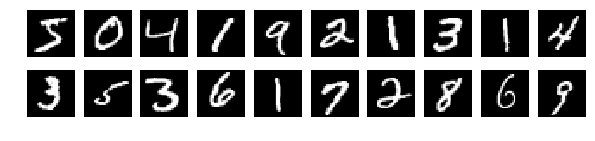

In [75]:
# MNIST DATA
# Use numpy.load() to load the .npz file
f = np.load('mnist.npz')
# Saving the files
x_train = f['x_train']
y_train = f['y_train']
x_test = f['x_test']
y_test = f['y_test']
f.close()
# To check data
print("x_train.shape = "+str(x_train.shape))
print("y_train.shape = "+str(y_train.shape))
fig = plt.figure(figsize=(10, 2))
for i in range(20):
    ax1 = fig.add_subplot(2, 10, i+1)
    ax1.imshow(x_train[i], cmap='gray');
    ax1.axis('off')